In [17]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [19]:
pd.read_csv('ml-curated-data.csv')

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.019090,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.019090,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.019090,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.019090,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.019090,0.016816,0.028896
5,-0.023294,0.059876,0.032627,-0.023162,-0.028393,0.028896,0.015672,0.019090,0.016816,0.029645
6,-0.063004,0.032627,0.075232,-0.028393,0.028896,0.029645,0.015672,0.019090,0.016816,0.058821
7,0.131306,0.075232,-0.021322,0.028896,0.029645,0.058821,0.015672,0.019090,0.016816,0.024489
8,-0.087671,-0.021322,-0.023162,0.029645,0.058821,0.024489,0.015672,0.019090,0.016816,0.051312
9,0.059876,-0.023162,-0.028393,0.058821,0.024489,0.051312,0.015672,0.019090,0.016816,-0.065009


In [20]:
DATOS=datos=pd.read_csv('ml-curated-data.csv')

In [21]:
datos.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age,wage_increase
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816,0.075232
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816,-0.021322
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816,-0.023162
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816,-0.028393
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816,0.028896


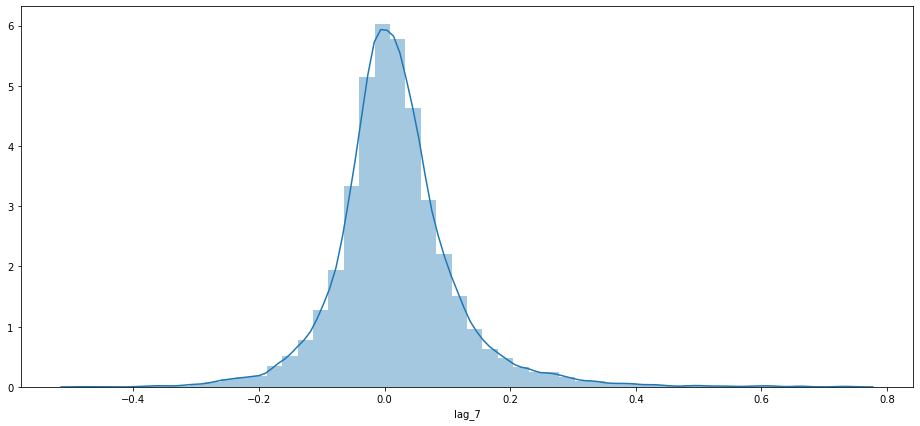

In [22]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(datos.iloc[:,1])


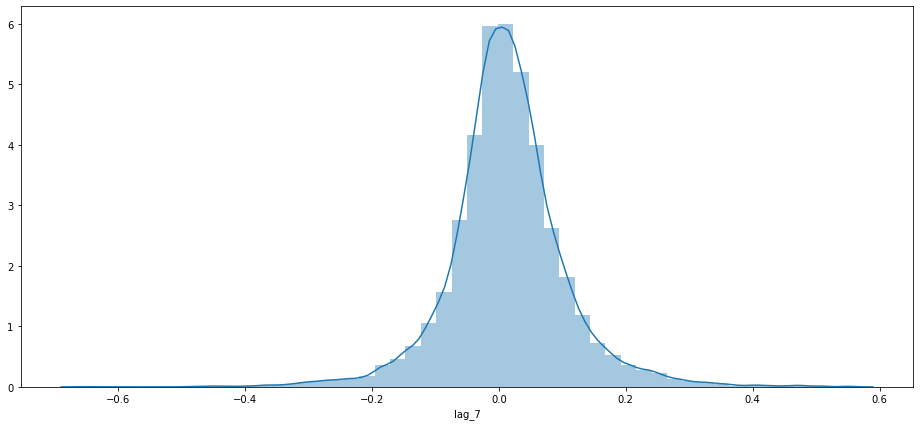

In [23]:
fig, ax=plt.subplots(figsize=(16,7))
sns.distplot(np.log1p(datos.iloc[:,1]))

In [24]:
X=datos.iloc[:,:-1]
Y=datos.iloc[:,-1]

In [25]:
X.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.01909,0.016816
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.01909,0.016816
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.01909,0.016816
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.01909,0.016816
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.01909,0.016816


In [26]:
X=datos.iloc[:,:-1]

In [27]:
X

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.024181,-0.053836,-0.023294,-0.087671,0.059876,0.032627,0.015672,0.019090,0.016816
1,0.001615,-0.023294,-0.063004,0.059876,0.032627,0.075232,0.015672,0.019090,0.016816
2,0.002881,-0.063004,0.131306,0.032627,0.075232,-0.021322,0.015672,0.019090,0.016816
3,0.093041,0.131306,-0.087671,0.075232,-0.021322,-0.023162,0.015672,0.019090,0.016816
4,-0.053836,-0.087671,0.059876,-0.021322,-0.023162,-0.028393,0.015672,0.019090,0.016816
5,-0.023294,0.059876,0.032627,-0.023162,-0.028393,0.028896,0.015672,0.019090,0.016816
6,-0.063004,0.032627,0.075232,-0.028393,0.028896,0.029645,0.015672,0.019090,0.016816
7,0.131306,0.075232,-0.021322,0.028896,0.029645,0.058821,0.015672,0.019090,0.016816
8,-0.087671,-0.021322,-0.023162,0.029645,0.058821,0.024489,0.015672,0.019090,0.016816
9,0.059876,-0.023162,-0.028393,0.058821,0.024489,0.051312,0.015672,0.019090,0.016816


In [28]:
Xnorm=np.log1p(datos.iloc[:,:-1])

In [29]:
Xnorm.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
0,0.023893,-0.055339,-0.023569,-0.091754,0.058152,0.032106,0.015551,0.01891,0.016676
1,0.001614,-0.023569,-0.065077,0.058152,0.032106,0.072536,0.015551,0.01891,0.016676
2,0.002877,-0.065077,0.123372,0.032106,0.072536,-0.021553,0.015551,0.01891,0.016676
3,0.088964,0.123372,-0.091754,0.072536,-0.021553,-0.023434,0.015551,0.01891,0.016676
4,-0.055339,-0.091754,0.058152,-0.021553,-0.023434,-0.028804,0.015551,0.01891,0.016676


In [33]:
from sklearn.model_selection import train_test_split

In [34]:
Xtrain, Xtest, Ytrain, Ytest =train_test_split(X,Y, test_size=.3)

In [35]:
Xtrain.head()

,lag_11,lag_7,lag_6,lag_3,lag_2,lag_1,state,gender,age
1167,0.090452,0.066815,-0.031678,0.111289,-0.038731,0.023112,0.016281,0.019090,0.015862
5673,0.002197,0.008993,-0.062033,-0.125993,0.026884,0.165653,0.015672,0.017736,0.016816
8046,-0.004747,-0.030545,0.106418,-0.006327,0.128149,0.006625,0.015738,0.017736,0.015862
3891,-0.013629,0.007842,0.025289,0.005358,0.072572,-0.047172,0.018936,0.019090,0.016816
2482,-0.052087,-0.033802,0.125955,-0.087054,0.392962,0.035768,0.018613,0.019090,0.016816


In [36]:
Ytrain = Ytrain.to_frame()

In [37]:
Ytrain

,wage_increase
1167,0.031701
5673,0.007925
8046,-0.080871
3891,0.058978
2482,-0.055668
2384,0.107133
7714,-0.162855
9805,-0.078743
3190,-0.031070
392,0.179551


In [38]:
from sklearn.tree import DecisionTreeRegressor

In [39]:
import random


def get_random_params():
    return {
        "criterion": random.choice(["mse", "friedman_mse", "mae"]),
        "splitter": random.choice(["best", "random"]),
        "max_depth": random.choice(list(range(1, 10)) + [None]),
        "max_features": random.choice((range(10, 100))) / 100
    }

param = get_random_params()
param

{'criterion': 'friedman_mse',
 'splitter': 'random',
 'max_depth': 2,
 'max_features': 0.62}

In [40]:
def get_rsme(df, param, target_col, features):
    train = df.sample(frac=0.7)
    test = df.drop(train.index)
    train_x = train.drop(target_col, 1)
    train_y = train.drop(features, 1)
    test_x = test.drop(target_col, 1)
    test_y = test.drop(features, 1)
    model=DecisionTreeRegressor(**param) 
    model.fit(train_x, train_y)
    estimates = model.predict(train_x)
    error = np.asmatrix(train_y.values - estimates)
    sme = (error.T * error / len(error)).tolist()[0][0]
    return np.sqrt(sme)

In [41]:
get_rsme(datos, param, target_col="wage_increase", features=[c for c in datos.columns if c != "wage_increase"])

0.09597469807449105

In [26]:
result = []
for i in range(1000):
    param = get_random_params()
    rsme = get_rsme(datos, param, target_col="wage_increase", features=[c for c in datos.columns if c != "wage_increase"])
    param["rsme"] = rsme
    result.append(param)


In [27]:
print (result)

[{'criterion': 'mse', 'splitter': 'best', 'max_depth': 6, 'max_features': 0.76, 'rsme': 0.09780058694432679}, {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 8, 'max_features': 0.65, 'rsme': 0.0960127494914306}, {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 3, 'max_features': 0.32, 'rsme': 0.09578719936549292}, {'criterion': 'friedman_mse', 'splitter': 'best', 'max_depth': 3, 'max_features': 0.59, 'rsme': 0.0966913092208127}, {'criterion': 'mae', 'splitter': 'random', 'max_depth': None, 'max_features': 0.84, 'rsme': 0.10412211047778672}, {'criterion': 'mae', 'splitter': 'best', 'max_depth': None, 'max_features': 0.2, 'rsme': 0.09803355695100784}, {'criterion': 'mae', 'splitter': 'random', 'max_depth': 2, 'max_features': 0.54, 'rsme': 0.09743794673020383}, {'criterion': 'mse', 'splitter': 'best', 'max_depth': None, 'max_features': 0.9, 'rsme': 0.11395129972613068}, {'criterion': 'friedman_mse', 'splitter': 'random', 'max_depth': 3, 'max_features': 0.7

In [33]:
result_df=pd.DataFrame(result)
print (result_df)

        criterion splitter  max_depth  max_features      rsme
0             mse     best        6.0          0.76  0.097801
1    friedman_mse   random        8.0          0.65  0.096013
2    friedman_mse   random        3.0          0.32  0.095787
3    friedman_mse     best        3.0          0.59  0.096691
4             mae   random        NaN          0.84  0.104122
..            ...      ...        ...           ...       ...
995           mse     best        5.0          0.57  0.098990
996           mse   random        9.0          0.16  0.097271
997           mse   random        6.0          0.31  0.095614
998           mse   random        8.0          0.42  0.100534
999           mae     best        2.0          0.23  0.097654

[1000 rows x 5 columns]


In [42]:
result_df.to_csv('1000.csv')

NameError: name 'result_df' is not defined

In [43]:
iteraciones=pd.read_csv('1000.csv')
iteraciones

,Unnamed: 0,criterion,splitter,max_depth,max_features,rsme
0,0,mse,best,6.0,0.76,0.097801
1,1,friedman_mse,random,8.0,0.65,0.096013
2,2,friedman_mse,random,3.0,0.32,0.095787
3,3,friedman_mse,best,3.0,0.59,0.096691
4,4,mae,random,NaN,0.84,0.104122
5,5,mae,best,NaN,0.20,0.098034
6,6,mae,random,2.0,0.54,0.097438
7,7,mse,best,NaN,0.90,0.113951
8,8,friedman_mse,random,3.0,0.76,0.094959
9,9,friedman_mse,random,6.0,0.83,0.098888


In [44]:
rsmes=iteraciones['rsme']
rsmes

0      0.097801
1      0.096013
2      0.095787
3      0.096691
4      0.104122
5      0.098034
6      0.097438
7      0.113951
8      0.094959
9      0.098888
10     0.096878
11     0.106005
12     0.099072
13     0.097056
14     0.094485
15     0.095055
16     0.097087
17     0.102363
18     0.096167
19     0.096852
20     0.098890
21     0.098584
22     0.102566
23     0.096504
24     0.098460
25     0.095606
26     0.097212
27     0.097402
28     0.101886
29     0.096429
         ...   
970    0.095930
971    0.096700
972    0.096716
973    0.096319
974    0.099141
975    0.098443
976    0.096399
977    0.096095
978    0.100882
979    0.095240
980    0.096722
981    0.111332
982    0.097570
983    0.096837
984    0.127393
985    0.100047
986    0.097365
987    0.104652
988    0.118251
989    0.095059
990    0.096257
991    0.096871
992    0.096253
993    0.096869
994    0.096442
995    0.098990
996    0.097271
997    0.095614
998    0.100534
999    0.097654
Name: rsme, Length: 1000

In [45]:
m=min(i for i in rsmes)
m

0.09358296559364168

In [46]:
mp=iteraciones[iteraciones.rsme == m]
mp

,Unnamed: 0,criterion,splitter,max_depth,max_features,rsme
847,847,mae,best,2.0,0.24,0.093583


In [47]:
Tree=DecisionTreeRegressor(criterion='mae', splitter='best', max_depth=2, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=.24, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, presort=False)

In [61]:
model = DecisionTreeRegressor(criterion='mae', max_depth=2.00, max_features=0.24,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')


In [50]:
model.fit(Xtrain, Ytrain)

DecisionTreeRegressor(criterion='mae', max_depth=2.0, max_features=0.24,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

In [51]:
estimates = model.predict(Xtrain)
estimates

array([0.01227673, 0.00465444, 0.00465444, ..., 0.01227673, 0.00465444,
       0.01227673])

In [52]:
Ypredict=model.predict(Xtest)

In [53]:
Comp=pd.DataFrame({'real': Ytest, 'Predict': Ypredict})
Comp

,real,Predict
6117,0.140745,0.012277
11029,0.046571,0.004654
4366,0.070066,-0.011671
2418,-0.056602,0.004654
5341,-0.053305,0.030784
7777,0.054142,0.004654
11086,-0.009752,0.004654
1710,-0.043341,0.004654
272,0.007194,0.012277
9005,-0.132830,0.012277


In [55]:
estimates = model.predict(Xtest)
error = np.asmatrix(Ytest.values - estimates)
sme = (error.T * error / len(error)).tolist()[0][0]
sme

0.016504084990110652

In [56]:
np.sqrt(sme)

0.12846822560505244

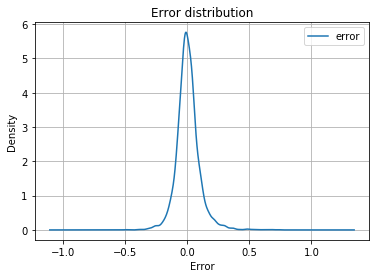

,error
count,338000.000000
mean,0.634134
std,9.320608
min,-49.360781
25%,-4.357756
50%,-0.016693
75%,4.772268
max,73.133087


In [57]:
df_errors = pd.DataFrame({'error': [e for ls in error.tolist() for e in ls]})
df_errors.plot.kde()
plt.title("Error distribution")
plt.xlabel("Error")
plt.grid()
plt.show()

100 * df_errors.describe()

In [58]:
test_results = pd.DataFrame(
    {
    "y": Ytest,
    "y_estimate": Ypredict
    }
)

100 * test_results.describe()

,y,y_estimate
count,338000.000000,338000.000000
mean,1.672991,1.038856
std,9.410894,1.123793
min,-48.133108,-1.167115
25%,-3.197256,0.465444
50%,1.039397,1.227673
75%,5.914337,1.227673
max,74.360760,3.078428


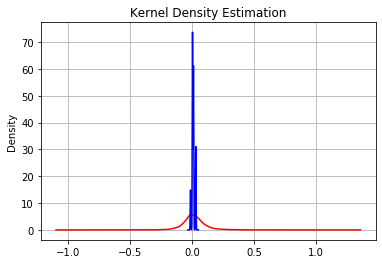

In [59]:
test_results.y.plot.kde(c='r')
test_results.y_estimate.plot.kde(c='b')
plt.title("Kernel Density Estimation")
plt.grid()
plt.show()

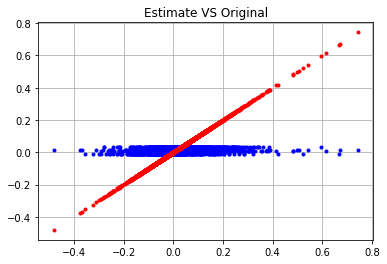

In [60]:

plt.plot(test_results.y, test_results.y_estimate, '.b')
plt.plot(test_results.y, test_results.y, '.r')
plt.title("Estimate VS Original")
plt.grid()
plt.show()

In [144]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [71]:
export_graphviz(model,out_file='arbol.dot',class_names=datos.target_names,feature_names=Ytrain.feature_names,impurity=False,filled=True)


AttributeError: 'DataFrame' object has no attribute 'target_names'

In [ ]:
with open ('arbol.dot') as f:
    dot_graph=f.read
    graphviz.source(dot.graph)

In [ ]:
tree.export_graphviz(model)
# Convertir el archivo .dot a png para poder visualizarlo
check_call(model)
PImage(model)